In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [12]:
data = pd.read_csv("./fuel_econ.csv")
data.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [13]:
data.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


In [14]:
# this statement splits the trans string into two and take the first element, so Automatic (AM6) = Automatic
data["trans_type"] = data["trans"].apply(lambda x: x.split()[0])


# there is a seaborn function that can handle this called heatmap.
# it takes in a 2D array or a data frame for data, so we need to do some summorization work before 
# we can create our plot.

# get the counts by vehicle class and transmission type that we created in the statement before.
data.groupby(["VClass", "trans_type"]).size()


VClass            trans_type
Compact Cars      Automatic     784
                  Manual        338
Large Cars        Automatic     605
                  Manual         20
Midsize Cars      Automatic     989
                  Manual        199
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
dtype: int64

In [30]:
ct_counts = data.groupby(["VClass", "trans_type"]).size()
# use reset index to turn the series into a data frame.
ct_counts = ct_counts.reset_index(name = "count")
# finally we use pivot to rearrange the data so that i have:
# vehicle class on rows, 
# transmission type on columns,
# and counts in cells
ct_counts = ct_counts.pivot(index = "VClass", columns = "trans_type", values = "count")
print(ct_counts)

trans_type        Automatic  Manual
VClass                             
Compact Cars            784     338
Large Cars              605      20
Midsize Cars            989     199
Minicompact Cars        188     133
Subcompact Cars         502     171


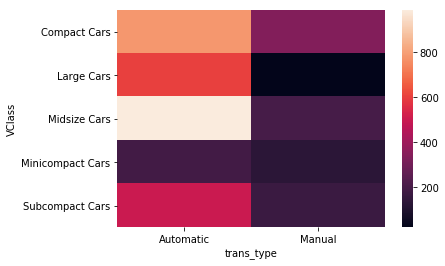

In [31]:
# now we can plot

sb.heatmap(ct_counts);

We can't tell much from the chart above so lets add annotations and counts to the graph. fmt = d says that counts are decimal values.  

In [ ]:
sb.heatmap(ct_counts, annot = True, fmt = "d");

We can also generate a clustered bar chart from our data.  

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

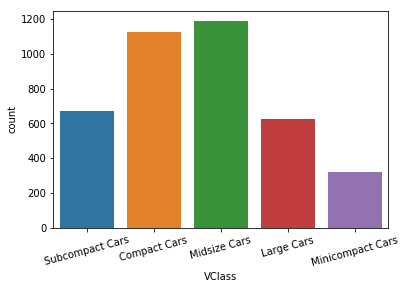

In [34]:
sb.countplot(data = data, x = "VClass")
plt.xticks(rotation = 15);

To divide the bars into multiple bars split based on transmission type we need to add a hue parameter pointing to the trans_type variable.

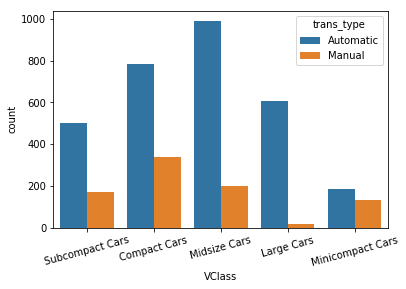

In [36]:
sb.countplot(data = data, x = "VClass", hue = "trans_type")
plt.xticks(rotation = 15);